<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/6.%20Week%206/Online_Retail_Data_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Load Data

In [1]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')  # Menonaktifkan peringatan

# URL untuk dataset
url = "https://github.com/farrelrassya/teachingMLDL/raw/main/01.%20Machine%20Learning/06.%20Week%206/Datasets/Online%20Retail.xlsx"

# Membaca dataset dari URL
df = pd.read_excel(url)

# Menampilkan beberapa baris pertama dari dataset
df.head()

# Menampilkan informasi mengenai dataset (jumlah kolom, tipe data, dsb.)
print(df.info())
# Menampilkan lima baris pertama data
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    

#1. Preprocessing Data

In [4]:
# Hapus baris dengan CustomerID yang hilang, Quantity negatif, dan UnitPrice negatif
df_cleaned = df.dropna(subset=['CustomerID'])  # Menghapus baris dengan CustomerID yang hilang
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]  # Menghapus Quantity negatif
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]  # Menghapus UnitPrice negatif

# Buat fitur TotalAmount
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Agregasi data per customer: menghitung total belanja (TotalAmount) dan jumlah transaksi (Frequency)
customer_aggregated = df_cleaned.groupby('CustomerID').agg({
    'TotalAmount': 'sum',  # Total belanja per customer
    'InvoiceNo': 'nunique'  # Jumlah transaksi unik per customer
}).reset_index()

# Mengubah nama kolom untuk kejelasan
customer_aggregated.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Tampilkan beberapa baris data setelah agregasi
customer_aggregated.head()


,CustomerID,TotalAmount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,7
2,12348.0,1797.24,4
3,12349.0,1757.55,1
4,12350.0,334.40,1


#2. Membuat Model Clustering


Silhouette Score: 0.7045876193006821


<function matplotlib.pyplot.show(close=None, block=None)>

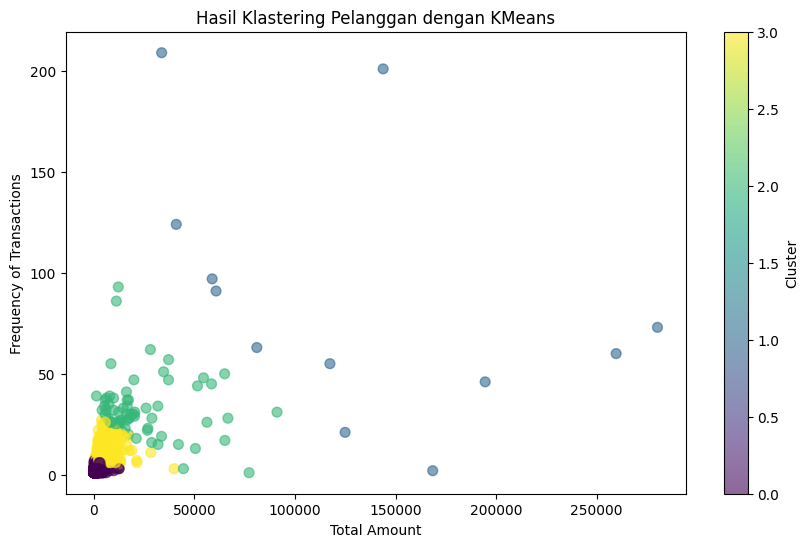

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Hapus baris dengan CustomerID yang hilang, Quantity negatif, dan UnitPrice negatif
df_cleaned = df.dropna(subset=['CustomerID'])  # Menghapus baris dengan CustomerID yang hilang
df_cleaned = df_cleaned[df_cleaned['Quantity'] > 0]  # Menghapus Quantity negatif
df_cleaned = df_cleaned[df_cleaned['UnitPrice'] > 0]  # Menghapus UnitPrice negatif

# Buat fitur TotalAmount
df_cleaned['TotalAmount'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

# Agregasi data per customer: menghitung total belanja (TotalAmount) dan jumlah transaksi (Frequency)
customer_aggregated = df_cleaned.groupby('CustomerID').agg({
    'TotalAmount': 'sum',  # Total belanja per customer
    'InvoiceNo': 'nunique'  # Jumlah transaksi unik per customer
}).reset_index()

# Mengubah nama kolom untuk kejelasan
customer_aggregated.rename(columns={'InvoiceNo': 'Frequency'}, inplace=True)

# Normalisasi fitur
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_aggregated[['TotalAmount', 'Frequency']])

# Membangun Model KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Menggunakan 4 klaster, bisa disesuaikan
customer_aggregated['Cluster'] = kmeans.fit_predict(customer_scaled)

# Evaluasi model menggunakan Silhouette Score
silhouette_avg = silhouette_score(customer_scaled, customer_aggregated['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Visualisasi Hasil Klastering
plt.figure(figsize=(10, 6))
plt.scatter(customer_aggregated['TotalAmount'], customer_aggregated['Frequency'], c=customer_aggregated['Cluster'], cmap='viridis', s=50, alpha=0.6)
plt.title('Hasil Klastering Pelanggan dengan KMeans')
plt.xlabel('Total Amount')
plt.ylabel('Frequency of Transactions')
plt.colorbar(label='Cluster')
plt.show


#3. Menghitung Matriks Cluster

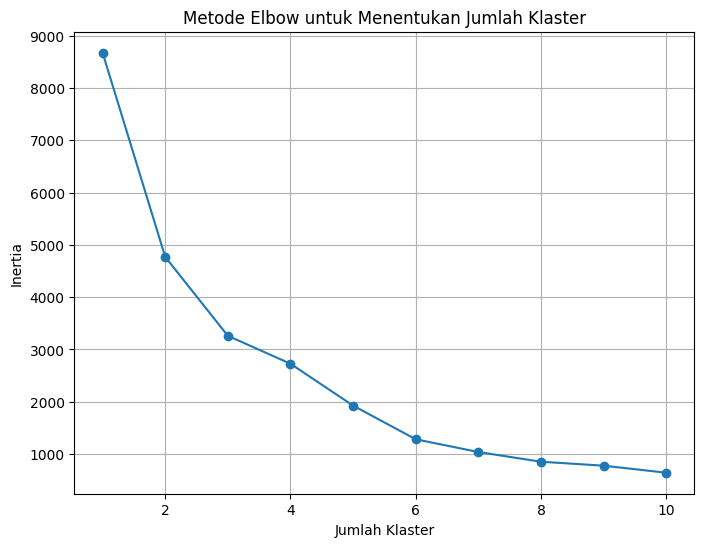

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur (jika diperlukan)
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_aggregated[['TotalAmount', 'Frequency']])

# Menghitung inertia untuk berbagai jumlah klaster
inertia = []
range_n_clusters = range(1, 11)  # Menguji jumlah klaster dari 1 sampai 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customer_scaled)
    inertia.append(kmeans.inertia_)

# Plot grafik Elbow
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Metode Elbow untuk Menentukan Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()



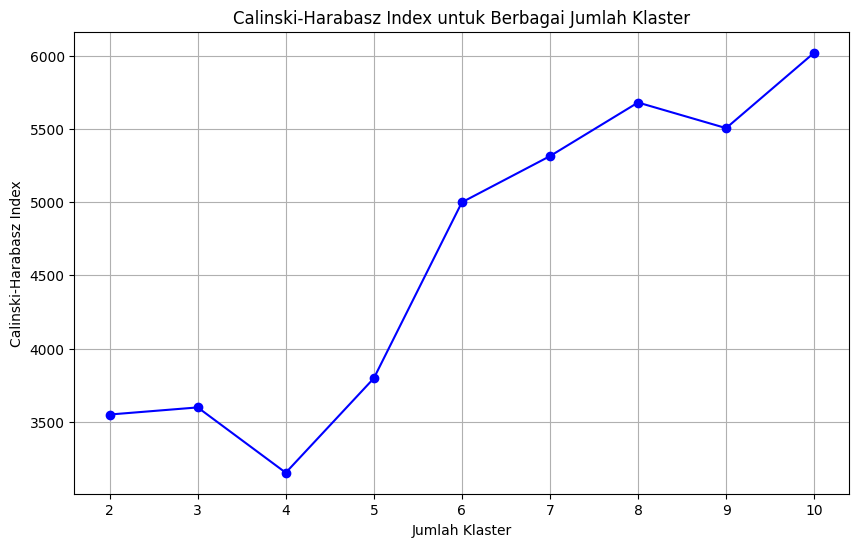

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_aggregated[['TotalAmount', 'Frequency']])

# Menghitung Calinski-Harabasz Index untuk berbagai jumlah klaster
calinski_scores = []
range_n_clusters = range(2, 11)  # Menguji jumlah klaster dari 2 sampai 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customer_scaled)

    # Menghitung Calinski-Harabasz Index untuk setiap jumlah klaster
    calinski_score = calinski_harabasz_score(customer_scaled, kmeans.labels_)
    calinski_scores.append(calinski_score)

# Plot grafik Calinski-Harabasz Index
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, calinski_scores, marker='o', color='b')
plt.title('Calinski-Harabasz Index untuk Berbagai Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Calinski-Harabasz Index')
plt.grid(True)
plt.show()


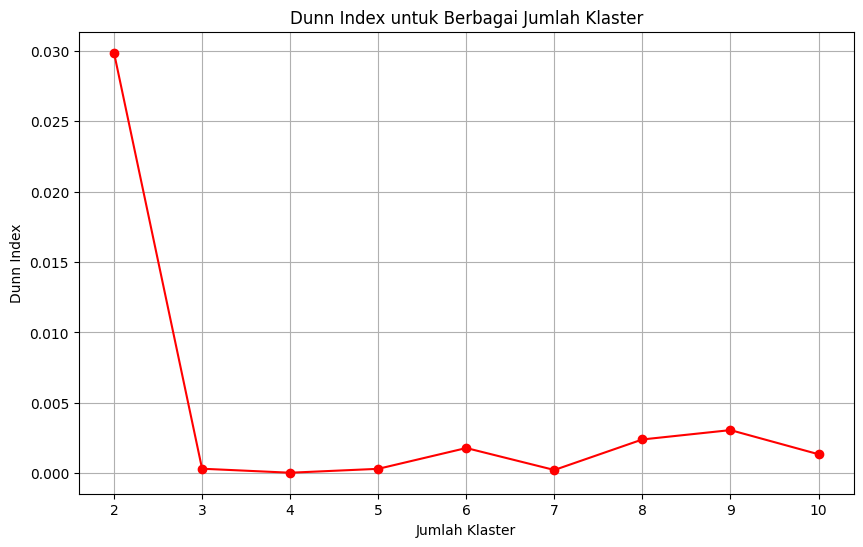

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_aggregated[['TotalAmount', 'Frequency']])

# Fungsi untuk menghitung Dunn Index
def dunn_index(data, labels):
    dist_matrix = pairwise_distances(data)  # Matriks jarak antar titik
    n_clusters = len(np.unique(labels))  # Jumlah klaster

    min_inter_cluster_distance = np.inf  # Inisialisasi jarak antar klaster
    max_intra_cluster_distance = -np.inf  # Inisialisasi diameter klaster

    # Loop untuk menghitung jarak antar klaster (inter-cluster distance)
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            cluster_i = np.where(labels == i)[0]  # Indeks titik di klaster i
            cluster_j = np.where(labels == j)[0]  # Indeks titik di klaster j

            # Menghitung jarak terkecil antar klaster i dan j
            inter_cluster_distance = np.min(dist_matrix[cluster_i][:, cluster_j])
            min_inter_cluster_distance = min(min_inter_cluster_distance, inter_cluster_distance)

    # Loop untuk menghitung diameter klaster (intra-cluster distance)
    for i in range(n_clusters):
        cluster_points = data[labels == i]  # Titik dalam klaster i
        intra_cluster_distances = pairwise_distances(cluster_points)  # Jarak antar titik dalam klaster
        max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_cluster_distances))

    # Menghitung Dunn Index
    dunn_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_value

# Menghitung Dunn Index untuk berbagai jumlah klaster
dunn_scores = []
range_n_clusters = range(2, 11)  # Menguji jumlah klaster dari 2 sampai 10

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(customer_scaled)

    # Menghitung Dunn Index untuk setiap jumlah klaster
    dunn_value = dunn_index(customer_scaled, kmeans.labels_)
    dunn_scores.append(dunn_value)

# Visualisasi Dunn Index untuk berbagai jumlah klaster
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, dunn_scores, marker='o', color='r')
plt.title('Dunn Index untuk Berbagai Jumlah Klaster')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Dunn Index')
plt.grid(True)
plt.show()


# Evaluasi Clustering

## 1. Elbow Methode (SSE)
 Elbow method menghitung nilai inertia untuk berbagai jumlah cluster. Inertia adalah jumlah kuadrat jarak Euclidean antara setiap titik dengan pusat cluster-nya.

Fungsi objektif dalam KMeans didefinisikan sebagai:

$$
\text{Inertia} = \sum_{k=1}^{K} \sum_{x_i \in C_k} \|x_i - \mu_k\|^2
$$

- $(K)$ : jumlah cluster  
- $(C_k)$ : himpunan titik pada cluster ke-\(k\)  
- $(\mu_k)$ : pusat (mean) dari cluster ke-\(k\)

Titik "elbow" yang ditunjukkan pada grafik menunjukkan jumlah cluster yang optimal.

---

## 2. Silhouette Coefficient

Silhouette coefficient mengukur seberapa mirip setiap titik dengan cluster-nya dibandingkan dengan cluster lain. Untuk setiap data $(i)$:

$$
s(i) = \frac{b(i) - a(i)}{\max \{ a(i), b(i) \}}
$$


- **$a(i)$**: jarak rata-rata dari titik $i$ ke semua titik lain dalam cluster yang sama (intra-cluster distance),  
- **$b(i)$**: jarak rata-rata dari titik $i$ ke semua titik pada cluster terdekat yang berbeda (nearest-cluster distance).

Nilai $s(i)$ berkisar dari -1 (cluster yang tidak sesuai) hingga +1 (cluster yang sangat kompak).

Nilai rata-rata silhouette mendekati 1 menunjukkan pemisahan cluster yang baik.

Kelebihan: mudah diinterpretasi dan memberikan insight per titik.

---

## 3. Calinski-Harabasz Index

Indeks ini mengukur seberapa baik cluster yang terbentuk dengan menghitung rasio variansi antar cluster terhadap variansi dalam cluster:

$$
CH = \frac{\text{Between-Cluster Dispersion}}{\text{Within-Cluster Dispersion}} \times \frac{N - k}{k - 1}
$$

- **$N$**: jumlah total data,  
- **$k$**: jumlah cluster,  
- **Between-Cluster Dispersion**: mengukur jarak antar centroid cluster,  
- **Within-Cluster Dispersion**: mengukur jarak antara titik data dengan centroid cluster masing-masing.

---

## 4. Dunn Index

Dunn Index mendefinisikan kualitas clustering dengan mengambil rasio antara jarak antar cluster minimum dan diameter maksimal di antara setiap cluster:

$$
\text{Dunn} = \frac{\min_{i \neq j} \; \delta(C_i,C_j)}{\max_{1 \leq k \leq K} \; \Delta(C_k)}
$$

- **$\delta(C_i,C_j)$**: jarak minimum antara tiap titik dari cluster $C_i$ dengan tiap titik dari cluster $C_j$,  
- **$\Delta(C_k)$**: diameter cluster $C_k$, yakni jarak maksimum antara dua titik dalam cluster yang sama.

Nilai Dunn Index yang besar menandakan adanya pemisahan antar cluster yang baik dan cluster yang kompak.

---

Metriks Terbaik:
- Elbow Method membantu menentukan jumlah cluster dengan menganalisis perubahan inertia, namun kurang eksplisit dalam memberi batasan untuk cluster yang “baik”.

- Silhouette Coefficient sangat populer karena mengkombinasikan informasi intra- dan inter-cluster serta mudah diinterpretasi.

- Calinski-Harabasz Index juga banyak digunakan karena sederhana dan cepat.

- Dunn Index memberikan gambaran yang sangat jelas mengenai pemisahan dan kompaksi cluster, tetapi terkadang sulit untuk dihitung pada dataset besar.

Dalam praktiknya, Silhouette Coefficient sering dijadikan patokan karena memberikan nilai yang relatif mudah dipahami, sementara Calinski-Harabasz Index bisa dipakai sebagai konfirmasi tambahan.

